--type--
<class 'numpy.ndarray'>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


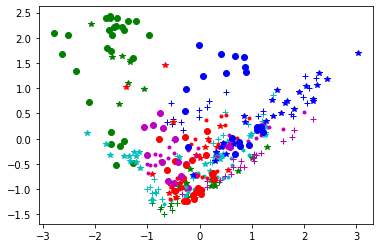

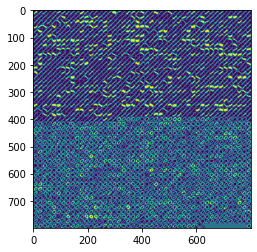

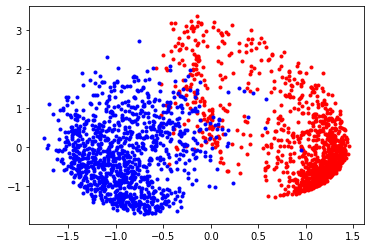

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 25 21:32:40 2019

@author: Georgia Tech, ISyE, Instructor Yao Xie 
"""
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp

# show image function
def show_image(centroids,H,W=None):
    if W == None: W = H
    N = centroids.shape[1]/(H*W)
    assert N == 3 or N == 1 # color and grey images
    
    K = centroids.shape[0]
    COLS = round(math.sqrt(K))
    ROWS = math.ceil(K/COLS)
    
    N = int(N)

    image = np.ones((ROWS*(H+1), COLS*(W+1), N))*100
    
    for i in range(centroids.shape[0]):
        r = math.floor(i / COLS)
        c = (i-1) % COLS

        image[(r*(H+1)+1):((r+1)*(H+1)),(c*(W+1)+1):((c+1)*(W+1)),:] = centroids[i,:W*H*N+1].reshape((H,W,N))
        
    plt.imshow(image[:,:,0])
    plt.show()
    
#%%
##########################
# PCA_leaf main function #
##########################
    
leaf = spio.loadmat('leaf.mat',squeeze_me=True)['M']

# dataset description
#The provided data comprises the following shape (attributes 3 to 9) and texture (attributes 10
#to 16) features:
#1. Class (Species)
#2. Specimen Number
#3. Eccentricity
#4. Aspect Ratio
#5. Elongation
#6. Solidity
#7. Stochastic Convexity
#8. Isoperimetric Factor
#9. Maximal Indentation Depth
#10. Lobedness
#11. Average Intensity
#12. Average Contrast
#13. Smoothness
#14. Third moment
#15. Uniformity
#16. Entropy

# extract attributes from raw data
Anew = leaf[:,2:17]
print("--type--")
print(type(Anew))
m,n = Anew.shape

# create indicator matrix
Inew = leaf[:,0]

# In this case, we normalize the data because features have very different ranges
stdA = np.std(Anew,axis = 0)
stdA = skpp.normalize(stdA.reshape(1,-1)) # the normalize is different from MATLAB's
Anew = Anew @ np.diag(np.ones(stdA.shape[1])/stdA[0])
Anew = Anew.T
# PCA
mu = np.mean(Anew,axis = 1)
xc = Anew - mu[:,None]

C = np.dot(xc,xc.T)/m

K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue

color_string = 'bgrmck'
marker_string = '.+*o'
leaf_fig = plt.figure()
for i in range(int(max(Inew))):
    print(i)
    color = color_string[i % 5]
    marker = marker_string[i % 4]
    m = color + marker
    leaf_fig.gca().plot(dim1[Inew == i],dim2[Inew == i],m)

plt.show()
leaf_fig.savefig('leaf2.png')
#%%
###########################
# PCA_digit main function #
###########################

usps = spio.loadmat('usps_all.mat',squeeze_me = True)['data']
pixelno = usps.shape[0]
digitno = usps.shape[1]
classno = usps.shape[2]

H = 16
W = 16

data = np.concatenate((usps[:,:,0],usps[:,:,9]),axis = 1).T

show_image(data,H,W)
# title: 'digit 1 and 0'

x0 = data.T.reshape((pixelno,digitno*2))
x = x0.astype(float)

y = np.concatenate((np.ones(digitno),2*np.ones(digitno)))
m1 = x.shape[1]
Anew1 = x

# PCA
mu1 = np.mean(Anew1,axis = 1)
xc1 = Anew1 - mu1[:,None]

C1 = np.dot(xc1,xc1.T)/m1

K = 2
S1,W1 = ll.eigs(C1,k = K)
S1 = S1.real
W1 = W1.real

dim1_1 = np.dot(W1[:,0].T,xc1)/math.sqrt(S1[0])
dim2_1 = np.dot(W1[:,1].T,xc1)/math.sqrt(S1[1])

digit_fig = plt.figure()
digit_fig.gca().plot(dim1_1[y == 1],dim2_1[y == 1],'r.')
digit_fig.gca().plot(dim1_1[y == 2],dim2_1[y == 2],'b.')
digit_fig.savefig('digit2.png')